# Kntu AI Final project 4021

### Import the nessecarry libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
def analysis(labels, predictions):
    print("Classification Report: \n", classification_report(labels, predictions, target_names=['positive', 'negative']))
    print("Confusion Matrix: \n", confusion_matrix(labels, predictions))
    print("Accuracy: ", accuracy_score(labels, predictions))

In [3]:
def train_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    accuracy_scores = []
    knns = []
    y_preds=[]
    for neighbours_count in range(15,25):
        knn = KNeighborsClassifier(n_neighbors=neighbours_count)
        knns.append(knn)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        y_preds.append(y_pred)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    plt.plot(list(range(15,25)), accuracy_scores)
    best_index = accuracy_scores.index(max(accuracy_scores))
    analysis(y_test, y_preds[best_index])

### Preprocessing the data

In [4]:
df = pd.read_csv("dataset.csv")
df.head()

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",negative
1,If you're a layman interested in quantum theor...,negative
2,It's amazing that this no talent actor Chapa g...,negative
3,This must be one of the most overrated Spanish...,negative
4,Some critics have compared Chop Shop with the ...,positive


The data is balanced so we can continue our journey

In [5]:
df.describe()

,comment,sentiment
count,45000,45000
unique,44664,2
top,"Hilarious, clean, light-hearted, and quote-wor...",positive
freq,4,22501


In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(df['comment'])

CountVectorizer()

In [7]:
X = vectorizer.transform(df['comment'])

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y

array([0, 0, 0, ..., 1, 0, 0])

Classification Report: 
               precision    recall  f1-score   support

    positive       0.71      0.59      0.65      5658
    negative       0.65      0.76      0.70      5592

    accuracy                           0.67     11250
   macro avg       0.68      0.67      0.67     11250
weighted avg       0.68      0.67      0.67     11250

Confusion Matrix: 
 [[3355 2303]
 [1370 4222]]
Accuracy:  0.6735111111111111


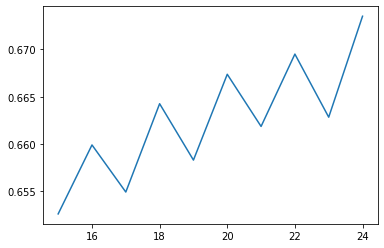

In [9]:
train_knn(X,y)

We one hot encode the sentiment column science it is categorical

In [10]:
stopwords = ['.', ',', ';', '"', '\'', '\n', '\r', 'br', '!', '?', '`', '<', '>', '/']

Download the nltk stop works to omitt them from the text

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mehrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords.extend(nltk.corpus.stopwords.words('english'))
stopwords[:5]

['.', ',', ';', '"', "'"]

In [13]:
stemmer = PorterStemmer()
def preprocess_comment(comment):
    for index, data in df.iterrows():
        comment_tokenized = word_tokenize(comment)
        comment_tokenized_filterd = [w for w in comment_tokenized if w not in stopwords]
        comment_tokenized_filterd_stemmed = [stemmer.stem(w) for w in comment_tokenized_filterd]
        return ' '.join(comment_tokenized_filterd_stemmed)

In [14]:
df['comment_tokenized_filterd_stemmed'] = df['comment'].apply(preprocess_comment)
df.drop('comment', axis=1, inplace=True)
df.head()

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(df['comment_tokenized_filterd_stemmed'])

CountVectorizer()

In [ ]:
X = vectorizer.transform(df['comment_tokenized_filterd_stemmed'])

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
train_knn(X, y)